In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from OpenAIService import OpenAIService

In [2]:
LOCATION = 'data'
LOCATION_PROCESSED = 'data_processed'
subreddits = ['frugal', 'anticonsumption', 'BuyItForLife']

In [3]:
dfs = {}

# load all submission jsonl data
for subreddit in subreddits:
    dfs[subreddit] = pd.read_json(f'{LOCATION}/r_{subreddit}_posts.jsonl', lines=True)

In [4]:
# count the number of posts in each subreddit
for subreddit in subreddits:
    print(f'{subreddit}: {len(dfs[subreddit])} submissions, {dfs[subreddit].num_comments.sum()} comments')

frugal: 202008 submissions, 5926082 comments
anticonsumption: 48523 submissions, 1179312 comments
BuyItForLife: 102816 submissions, 2004738 comments


In [5]:
df_all = pd.concat(dfs.values(), ignore_index=True)

In [6]:
# count the number of total posts 
print(f'Total: {len(df_all)} submissions, {df_all.num_comments.sum()} comments')

Total: 353347 submissions, 9110132 comments


In [7]:
# filter out posts with no comments
df_filtered = df_all[df_all.num_comments > 0]

# # filter out posts with a score greater than 2000
df_filtered = df_filtered[df_all.score <= 2000]

# count the number of posts after filtering
print(f'Filtered: {len(df_filtered)} submissions, {df_filtered.num_comments.sum()} comments')


/var/folders/wq/k5hy5l4j6pbd_js2dbk6vhfc0000gn/T/ipykernel_53966/1869918345.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[df_all.score <= 2000]


Filtered: 260882 submissions, 7529884 comments


In [8]:
# save the filtered data
df_filtered.to_json(f'{LOCATION_PROCESSED}/all_submissions_filtered.jsonl', orient='records', lines=True)

<Axes: xlabel='subreddit'>

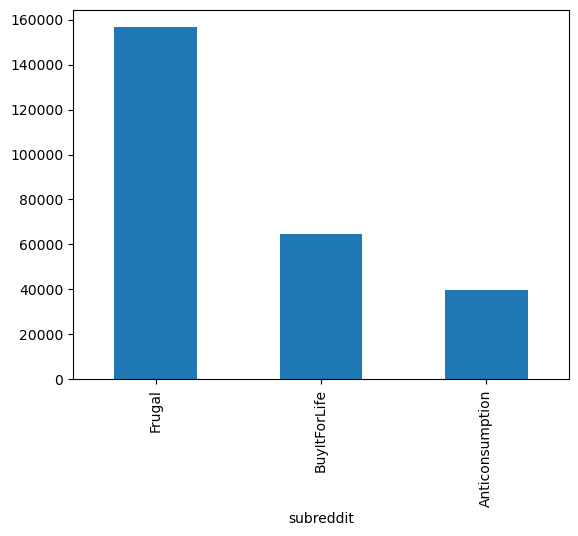

In [9]:
# print subreddit distribution
df_filtered['subreddit'].value_counts().plot(kind='bar')